In [1]:
#  For sting e changes I made in python files

In [2]:
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal


In [3]:
config["general"]["detector"] = "POne"
config["general"]["year"] = 5

In [4]:
b = Atm_Shower()

In [5]:
Ae = Aeff()

In [6]:
dm = DM2Nu()

In [7]:
dete = Detector(Ae)


In [8]:
bac = Background(b, dete)


In [9]:
s = Signal(Ae, dm, dete)
angle_grid = config['atmospheric showers']['theta angles']

In [19]:
signal = s.signal_calc(b.egrid, 1e4, 1e-25, angle_grid)

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:340: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:341: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd


In [11]:
x= Limits(s, b, bac)

100%|██████████| 15/15 [00:09<00:00,  1.57it/s]


In [12]:
surface_flux_dic = x.limit

In [21]:
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']

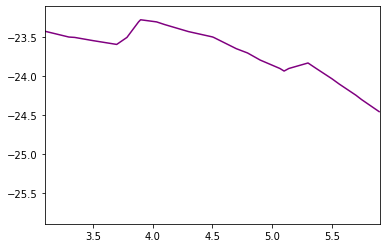

In [32]:
plt.contour(1-surface_flux_dic['numu'], levels = [0.9], colors='purple',
                origin='upper', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))

In [ ]:
test  # labels : neutrino flavours ( total = atro + atmos )

In [ ]:
plt.bar(np.log10(x._egrid), test['numu'])
#plt.bar(np.log10(x._egrid), integrated_grid_astro)
plt.yscale("log")
plt.ylim(1., 1e3)
plt.xlim(4, 6.5)